# STAT 201: Group 29 Project Proposal
##### Brian Moniaga, Jiahe Jiang, Jiakang Huang, Nolan Vibhakar
##### Date: October 29th, 2023

In [6]:
# Use the library function to load the R packages
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(RColorBrewer)
library(tidymodels)

## Import packages:

## Introduction:

## Data Analysis:

In [74]:
# Read the CSV file
student_data <- read_csv("student.csv", col_names = TRUE, show_col_types = FALSE) |>
    select(Student_ID, Parental_Status, Mothers_Education, Fathers_Education, CGPA_Last_Semester, Expected_CGPA_On_Graduation) |>
    mutate(Parental_Status = ifelse(Parental_Status == 1, "married", 
                             ifelse(Parental_Status == 2, "divorced",
                             ifelse(Parental_Status == 3, "died", Parental_Status)))) |>
    mutate(Mothers_Education = ifelse(Mothers_Education == 1, "primary school",
                                ifelse(Mothers_Education == 2, "secondary school",
                                ifelse(Mothers_Education == 3, "high school",
                                ifelse(Mothers_Education == 4, "university",
                                ifelse(Mothers_Education == 5, "MSc.",
                                ifelse(Mothers_Education == 6, "Ph.D.", Mothers_Education))))))) |>
    mutate(Fathers_Education = ifelse(Fathers_Education == 1, "primary school",
                                ifelse(Fathers_Education == 2, "secondary school",
                                ifelse(Fathers_Education == 3, "high school",
                                ifelse(Fathers_Education == 4, "university",
                                ifelse(Fathers_Education == 5, "MSc.",
                                ifelse(Fathers_Education == 6, "Ph.D.", Fathers_Education)))))))
head(student_data, 5)

Student_ID,Parental_Status,Mothers_Education,Fathers_Education,CGPA_Last_Semester,Expected_CGPA_On_Graduation
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
STUDENT1,married,primary school,secondary school,1,1
STUDENT2,married,secondary school,high school,2,3
STUDENT3,married,secondary school,secondary school,2,2
STUDENT4,married,primary school,secondary school,3,2
STUDENT5,married,high school,high school,2,2


#### There are 145 students contained in this dataset
* Student_ID
* Sex: (1: female, 2: male)
* Parental_Status: (1: married, 2: divorced, 3: died - one of them or both)
* Mothers_Education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* Fathers_Education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* CGPA_Last_Semester(/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* Expected_CGPA_On_Graduation(/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

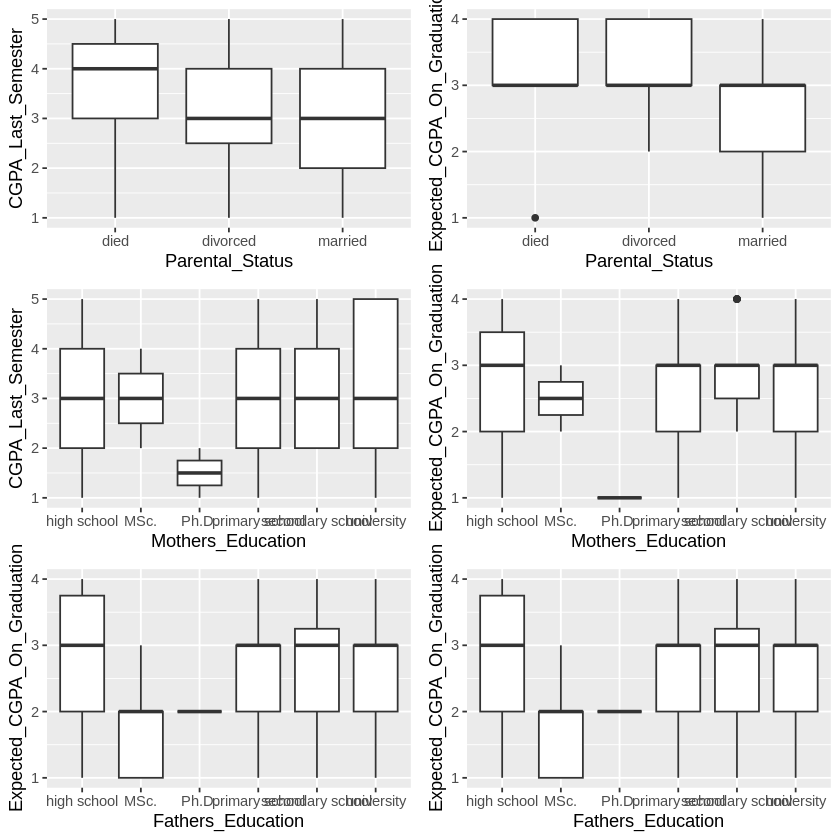

In [79]:
boxplots_Parental_Status_CGPA_Last_Semester <- 
   student_data %>%  
   ggplot(aes(x = Parental_Status, y = CGPA_Last_Semester)) + 
   geom_boxplot() 

boxplots_Parental_Status_Expected_CGPA_On_Graduation <- 
    student_data %>%  
   ggplot(aes(x = Parental_Status, y = Expected_CGPA_On_Graduation)) + 
   geom_boxplot()

boxplots_Mothers_Education_CGPA_Last_Semester <- 
    student_data %>%  
   ggplot(aes(x = Mothers_Education, y = CGPA_Last_Semester)) + 
   geom_boxplot() 

boxplots_Fathers_Education_Expected_CGPA_On_Graduation <- 
    student_data %>%  
   ggplot(aes(x = Fathers_Education, y = Expected_CGPA_On_Graduation)) + 
   geom_boxplot() 

boxplots_Fathers_Education_Expected_CGPA_On_Graduation <- 
    student_data %>%  
   ggplot(aes(x = Fathers_Education, y = Expected_CGPA_On_Graduation)) + 
   geom_boxplot() 

plot_grid <- plot_grid(boxplots_Parental_Status_CGPA_Last_Semester, boxplots_Parental_Status_Expected_CGPA_On_Graduation, boxplots_Mothers_Education_CGPA_Last_Semester, boxplots_Mothers_Education_Expected_CGPA_On_Graduation, boxplots_Fathers_Education_Expected_CGPA_On_Graduation, boxplots_Fathers_Education_Expected_CGPA_On_Graduation, ncol = 2)
plot_grid

## Methods:

## Expected outcomes and significance:
#### Expected outcomes:

#### Impact of Findings:

#### For Future:


## Work Cited:
1. 

2. 

3. 